In [47]:
# Librarires for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Libraries for modelling,data preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [48]:
df=pd.read_csv("CarPrice.csv")

In [49]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [51]:
df.shape

(205, 26)

In [52]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

This data is clean so there is no need for imputation.

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [54]:
df.duplicated().sum() # checking for duplicate values

0

In [55]:
df.columns[:-1] #all dependent variables

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [56]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
cat_cols=df.select_dtypes(include=object).columns.tolist()
print("numeric_cols:",num_cols)
print("categorical_cols:",cat_cols)

numeric_cols: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
categorical_cols: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


# Exploratory Data Analysis And Visualization

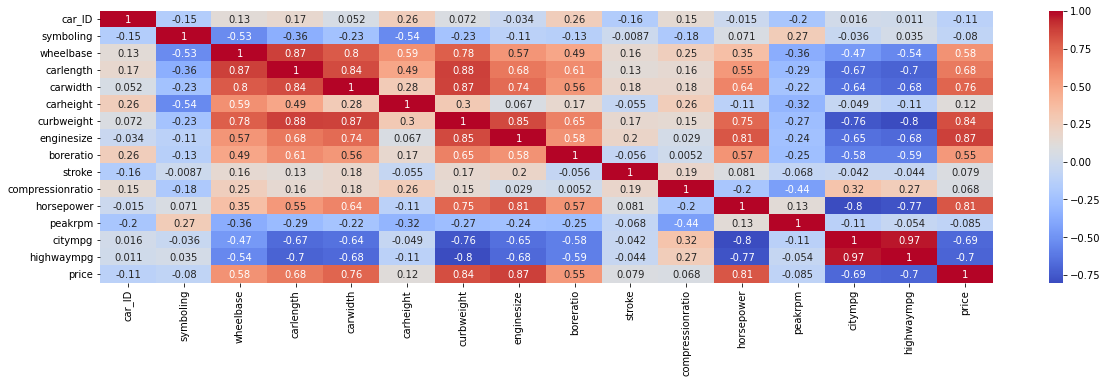

In [57]:
plt.figure(figsize=(20, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

We can see that highly correlated attributes are citympg and highwaympg.

# Distribution of the Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


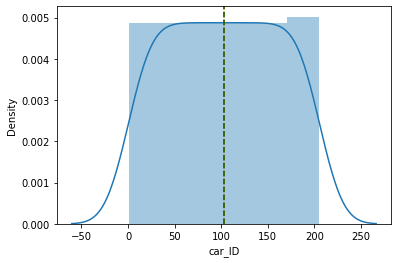

In [64]:
%matplotlib inline
sns.distplot(df.car_ID);
plt.axvline(df.car_ID.mean(),color='red',ls='--');
plt.axvline(df.car_ID.median(),color='green',ls='--');


As we can see that mean = mode = median so we can say that car_ID follows normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


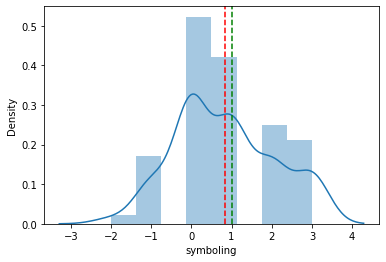

In [13]:
sns.distplot(df.symboling);
plt.axvline(df.symboling.mean(),color='red',ls='--');
plt.axvline(df.symboling.median(),color='green',ls='--');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


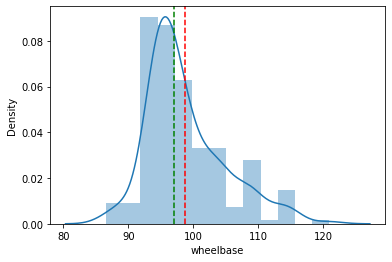

In [14]:
sns.distplot(df.wheelbase);
plt.axvline(df.wheelbase.mean(),color='red',ls='--');
plt.axvline(df.wheelbase.median(),color='green',ls='--');

As mean>median>mode, so wheelbase is rightskewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


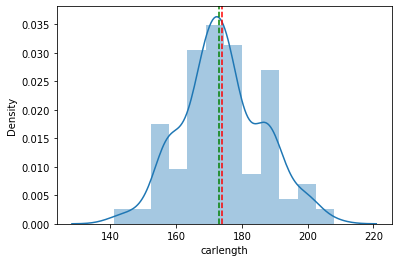

In [15]:
sns.distplot(df.carlength);
plt.axvline(df.carlength.mean(),color='red',ls='--');
plt.axvline(df.carlength.median(),color='green',ls='--');

Mean>Median>Mode so carlength is right skewed.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


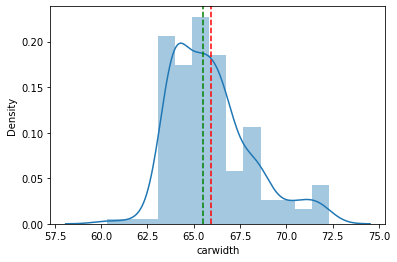

In [16]:
sns.distplot(df.carwidth);
plt.axvline(df.carwidth.mean(),color='red',ls='--');
plt.axvline(df.carwidth.median(),color='green',ls='--');

Mean>Median>Mode so carwidth is right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


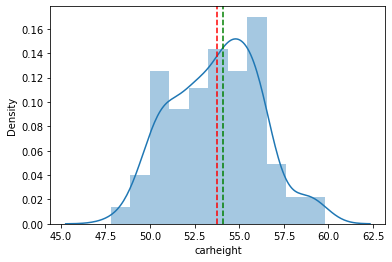

In [17]:
sns.distplot(df.carheight);
plt.axvline(df.carheight.mean(),color='red',ls='--');
plt.axvline(df.carheight.median(),color='green',ls='--');

As mean < median < mode so carheight is left skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


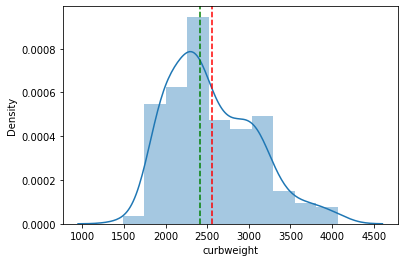

In [18]:
sns.distplot(df.curbweight);
plt.axvline(df.curbweight.mean(),color='red',ls='--');
plt.axvline(df.curbweight.median(),color='green',ls='--');

Mean > Median > Mode so curbweight is right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


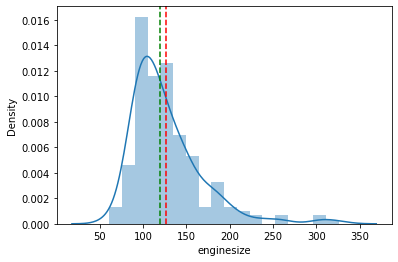

In [19]:
sns.distplot(df.enginesize);
plt.axvline(df.enginesize.mean(),color='red',ls='--');
plt.axvline(df.enginesize.median(),color='green',ls='--');

Mean > Median > Mode So enginesize is right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


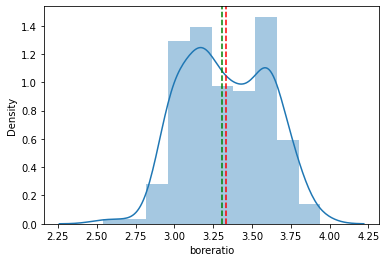

In [20]:
sns.distplot(df.boreratio);
plt.axvline(df.boreratio.mean(),color='red',ls='--');
plt.axvline(df.boreratio.median(),color='green',ls='--');

Mean > Median > Mode so boreratio is right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


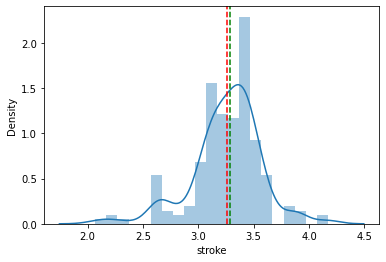

In [21]:
sns.distplot(df.stroke);
plt.axvline(df.stroke.mean(),color='red',ls='--');
plt.axvline(df.stroke.median(),color='green',ls='--');

Mean < Median < Mode so stroke is left skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


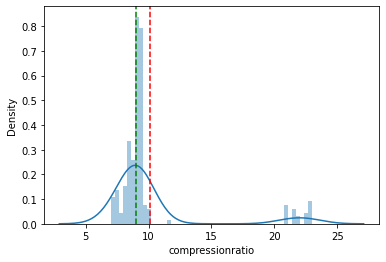

In [22]:
sns.distplot(df.compressionratio);
plt.axvline(df.compressionratio.mean(),color='red',ls='--');
plt.axvline(df.compressionratio.median(),color='green',ls='--');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


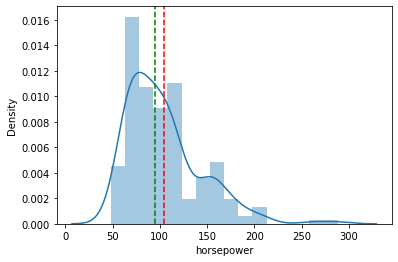

In [23]:
sns.distplot(df.horsepower);
plt.axvline(df.horsepower.mean(),color='red',ls='--');
plt.axvline(df.horsepower.median(),color='green',ls='--');

Mean > Median > Mode so it is right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


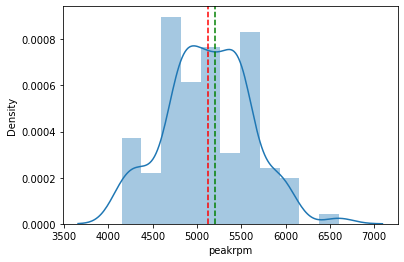

In [24]:
sns.distplot(df.peakrpm);
plt.axvline(df.peakrpm.mean(),color='red',ls='--');
plt.axvline(df.peakrpm.median(),color='green',ls='--');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


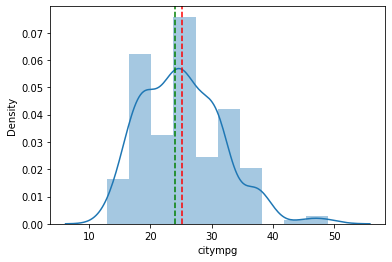

In [25]:
sns.distplot(df.citympg);
plt.axvline(df.citympg.mean(),color='red',ls='--');
plt.axvline(df.citympg.median(),color='green',ls='--');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


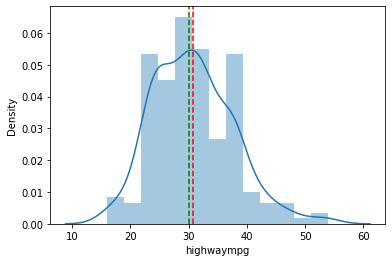

In [26]:
sns.distplot(df.highwaympg);
plt.axvline(df.highwaympg.mean(),color='red',ls='--');
plt.axvline(df.highwaympg.median(),color='green',ls='--');

Mean > Median > Mode so it is right skewed.

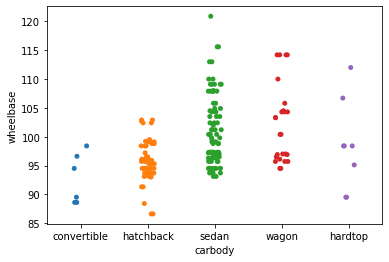

In [28]:
sns.stripplot(y=df.wheelbase,x=df.carbody)


We can see that hatchback wheelbase is scattered  between 92 to 97,for sedan carbody its 93 to 112,for wagon its 93 to 96.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


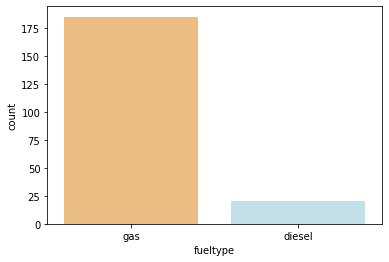

In [29]:
sns.countplot(df.fueltype,palette='RdYlBu')

Total vehicle on gas is 175 while on diesel it approx 25.

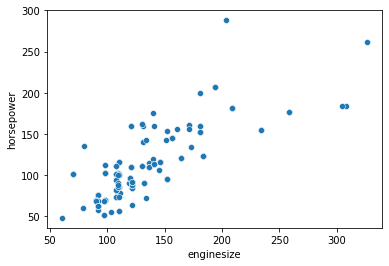

In [30]:
sns.scatterplot(x=df.enginesize,y=df.horsepower)

We can see that horse power is not completely dependent on enginesize because there are some whose engine size is less but there horse power is more.



In [31]:
# encoding for categorical values
label=preprocessing.LabelEncoder()
df['CarName']=label.fit_transform(df['CarName'])
df['fueltype']=label.fit_transform(df['fueltype'])
df['aspiration']=label.fit_transform(df['aspiration'])
df['doornumber']=label.fit_transform(df['doornumber'])
df['carbody']=label.fit_transform(df['carbody'])
df['drivewheel']=label.fit_transform(df['drivewheel'])
df['enginelocation']=label.fit_transform(df['enginelocation'])
df['enginetype']=label.fit_transform(df['enginetype'])
df['cylindernumber']=label.fit_transform(df['cylindernumber'])
df['fuelsystem']=label.fit_transform(df['fuelsystem'])



In [32]:
input_cols = list(df.columns)[0:-1] # independent features
target_col = 'price' #Dependent feature

In [33]:
X = df[input_cols]
y = df[target_col]

In [34]:
# splitting our dataset into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
X_train.shape #shape of train dataset

(143, 25)

In [36]:
X_test.shape # shape of test dataset

(62, 25)

In [37]:
 y_train.shape, y_test.shape

((143,), (62,))

In [38]:
# Scling using standard scaler method
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)


# Decision Tree

In [39]:
model = DecisionTreeRegressor(random_state=42)

In [40]:
model.fit(X_train_sc,y_train)



DecisionTreeRegressor(random_state=42)

In [41]:
# prediction
pred_test = model.predict(X_test_sc)

In [42]:
model.score(X_test_sc,pred_test)

1.0

100 percent accuracy due to less adequate data.

In [43]:
print("mean absolute error-->",mean_absolute_error(y_test,pred_test))
mse=mean_squared_error(y_test,pred_test)
print("mean squared error-->",mse)
print(" Root mean squared error-->",np.sqrt(mse))
print("r2 square-->",r2_score(y_test,pred_test))

mean absolute error--> 2014.529564516129
mean squared error--> 8782494.825546596
 Root mean squared error--> 2963.527429524923
r2 square--> 0.8732398990713172


# Random Forest

In [44]:
model2=RandomForestRegressor(n_estimators=115,random_state=90,n_jobs=-1)
model2.fit(X_train_sc,y_train)
prediction_train = model2.predict(X_train_sc)
prediction_test = model2.predict(X_test_sc)
model2.score(X_test_sc,prediction_test)

1.0

In [45]:
#Finding the error
print("mean absolute error of random forest-->",mean_absolute_error(y_test,prediction_test))
mse=mean_squared_error(y_test,prediction_test)
print("mean squared error of random forest-->",mse)
print(" Root mean squared error of random forest-->",np.sqrt(mse))
print("r2 square of random forest-->",r2_score(y_test,prediction_test))

mean absolute error of random forest--> 1412.1578955119212
mean squared error of random forest--> 4016481.5252601528
 Root mean squared error of random forest--> 2004.1161456512825
r2 square of random forest--> 0.9420290460019166


Model Evaluation:

We can see that mean squared error,mean absolute error,root mean squared error for radnom forest is less than the decision tree so we can say that random forest is giving us the better result.


# Conclusion

As Decision tree is giving 100% accuracy due to having less data but in random forest also accuracy is coming 100% but the error is coming small as compared to decision tree so random forest is better than decision tree because random forest trains multiple decision tree with row sampling and then aggregate the output of all decision tree to give the final prediciton. Also,r2 square of random forest is better than decision tree i.e 94.2% poportion of variation of  dependent variable is explained by the independent variables.